[<img src="https://www.totallandscapecare.com/wp-content/uploads/sites/5/2016/04/ASLA-logo.jpg" style="width:500px">](https://www.asla.org/stormwatercasestudies.aspx)

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
import sys
import types
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_48928a04ca8e42ed87d1026e6bbfe31a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cKFY8NgVSr8IZPnKreuUVxKwpoOS2EHpqYpoZ-xM69NF',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_48928a04ca8e42ed87d1026e6bbfe31a.get_object(Bucket='courseracapstone-donotdelete-pr-fxod1bkevlkezk',Key='ASLA-1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

asla = pd.read_csv(body)
asla['Size/ Capture area (Sq. feet)'] = asla['Size/ Capture area (Sq. feet)'].astype(float)
asla['GI COST (2)'] = asla['GI COST (2)'].astype(float)

In [3]:
asla.head()

,CITY,STATE,CASE STUDY TITLE,FINANCIAL SOURCE,FINANCIAL TOOL,GI PROJECT FINANCED,Size/ Capture area (Sq. feet),GI COST (2)
0,Cincinnati,Ohio,Lick Run,Public funding,NaN,"Bioretention facility, rain garden, bioswale, ...","217,800.00","122,000,000.00"
1,Atlanta,Georgia,Emory University Stormwater Master Plan,Private funding,NaN,"Bioretention facility, rain garden, bioswale, ...","217,800.00","90,200,000.00"
2,Portland,Oregon,Tabor To The River Program,Public funding,NaN,"Bioretention facility, rain garden, green roof...","217,800.00","80,920,000.00"
3,Seattle,Washington,Taylor 28,Private funding,NaN,"Bioretention facility, rain garden, cistern, p...","130,680.00","38,000,000.00"
4,Los Angeles,California,South Los Angeles Wetland Park Site Plan,Public funding,NaN,"Bioretention facility, bioswale, and porous pa...","130,680.00","24,000,000.00"


**Cleaning and selecting only the relevant cases**

In [4]:
columns = ['STATE','FINANCIAL SOURCE']

for column in columns:
    asla[column] = asla[column].str.lstrip()  #removing leading spaces 

In [5]:
print('Initial Row Count: ',asla.shape[0])

Initial Row Count:  461


**Filtering out Canadian cases**


In [6]:
asla=asla[asla['STATE']!='Canada'] 

In [7]:
print('New Row Count:',asla.shape[0])
print('Lost:',461-asla.shape[0],'rows')

New Row Count: 454
Lost: 7 rows


**Cutting critical null values**

In [8]:
print('There are',sum(asla['FINANCIAL SOURCE'].isnull()),'cases missing financial source data')

There are 5 cases missing financial source data


In [9]:
asla[asla['FINANCIAL SOURCE'].isnull()]

,CITY,STATE,CASE STUDY TITLE,FINANCIAL SOURCE,FINANCIAL TOOL,GI PROJECT FINANCED,Size/ Capture area (Sq. feet),GI COST (2)
456,San Diego,California,La Jolla Shores Area of Special Biological Sig...,NaN,NaN,NaN,nan,0.00
457,Gainesville,Florida,Madera - Community and Model Center,NaN,NaN,NaN,nan,0.00
458,Ruston,Louisiana,City of Ruston-Louisiana Research Park Streets...,NaN,NaN,NaN,nan,0.00
459,Philadelphia,Pennsylvania,Shissler Rec. Center (Big Green Block),NaN,NaN,NaN,nan,0.00
460,Southeastern,Pennsylvania,T-VSSI Regional Stormwater BMP Database,NaN,NaN,NaN,nan,0.00


In [10]:
asla = asla[asla['FINANCIAL SOURCE'].notnull()]

In [11]:
print('New Row Count:',asla.shape[0])
print('Lost:',454-asla.shape[0],'rows')
print('Total Lost Rows:',7+(454-asla.shape[0]))

New Row Count: 449
Lost: 5 rows
Total Lost Rows: 12


In [12]:
print('There are',sum(asla['Size/ Capture area (Sq. feet)'].isnull()),'cases missing project size')

There are 5 cases missing project size


In [13]:
asla[asla['Size/ Capture area (Sq. feet)'].isnull()]

,CITY,STATE,CASE STUDY TITLE,FINANCIAL SOURCE,FINANCIAL TOOL,GI PROJECT FINANCED,Size/ Capture area (Sq. feet),GI COST (2)
212,San Mateo,California,San Mateo County Sustainable Green Streets,Public funding,NaN,Technical stormwater design guidebook of green...,nan,"300,000.00"
412,Sussex County,Kentucky,EPA Technical Assistance and Design Guidebooks,Private funding,NaN,"Bioretention facility, rain garden, bioswale, ...",nan,"30,000.00"
421,New York,New York,Greenstreets - Furmanville Ave,Public funding,Grant,"Bioretention facility, bioswale, gravel reserv...",nan,"30,000.00"
427,Portland,Oregon,SE 21st and Tibbetts Green Street,Public funding,NaN,"Green roof, downspout removal, stormwater curb...",nan,"30,000.00"
455,Upland,California,Cucamonga Basin #6,Public funding,NaN,NaN,nan,0.00


In [14]:
asla = asla[asla['Size/ Capture area (Sq. feet)'].notnull()]

In [15]:
print('New Row Count:',asla.shape[0])
print('Lost:',449-asla.shape[0],'rows')
print('Total Lost Rows:',12+(449-asla.shape[0]))

New Row Count: 444
Lost: 5 rows
Total Lost Rows: 17


In [16]:
print('There are',sum(asla['GI COST (2)'].isnull()),'cases missing project cost')

There are 0 cases missing project cost


**Summary Statistics**

In [17]:
asla[['Size/ Capture area (Sq. feet)','GI COST (2)']].describe()

,Size/ Capture area (Sq. feet),GI COST (2)
count,444.00,444.00
mean,"143,427.68","1,901,670.60"
std,"632,797.91","8,450,122.80"
min,"1,300.00","3,000.00"
25%,"24,280.00","75,000.00"
50%,"130,680.00","300,000.00"
75%,"130,680.00","2,081,250.00"
max,"13,068,000.00","122,000,000.00"


In [18]:
print('Total awards =',sum(asla['GI COST (2)']))

Total awards = 844341748.0


**State Distribution**

In [19]:
print('Total states represented = ',len(asla['STATE'].unique()))

Total states represented =  44


In [20]:
asla.groupby('STATE')['GI COST (2)'].sum().sort_values(ascending=False)

STATE
Ohio                         140,161,100.00
New York                     103,263,528.00
Georgia                      101,277,000.00
Oregon                       100,437,000.00
California                    92,363,441.00
Washington                    48,709,473.00
Illinois                      36,605,117.00
Indiana                       20,427,000.00
Pennsylvania                  18,756,257.00
Iowa                          17,751,328.00
Louisiana                     16,440,000.00
Colorado                      15,637,000.00
Michigan                      15,311,410.00
Wisconsin                     14,715,000.00
Minnesota                     11,644,968.00
Arizona                       10,200,000.00
Tennessee                      9,000,000.00
Alabama                        8,151,840.00
Missouri                       8,077,000.00
Kentucky                       7,306,226.00
Massachusetts                  6,733,850.00
Maryland                       4,972,000.00
Connecticut               

In [21]:
asla.groupby('STATE')['CITY'].count().sort_values(ascending=False)

STATE
New York                56
California              49
Pennsylvania            32
Illinois                26
Oregon                  25
Ohio                    20
Michigan                16
Louisiana               15
Missouri                13
Alabama                 12
Washington              12
District of Columbia    11
Wisconsin               11
Minnesota               11
Idaho                   10
Florida                  9
North Carolina           9
Georgia                  8
Maryland                 8
Colorado                 7
Massachusetts            7
Indiana                  7
Kentucky                 6
Kansas                   6
Connecticut              6
Arizona                  5
New Mexico               5
New Jersey               5
New Hampshire            4
Iowa                     4
Oklahoma                 3
Texas                    3
Tennessee                3
Mississippi              3
Virginia                 3
Arkansas                 3
Utah                  

**Size and Cost Distribution**  
*These were the bins specifically requested*

In [22]:
print('< 20,000:',sum(asla['Size/ Capture area (Sq. feet)']<20000))
print('20,000 - 40,000:',sum(asla['Size/ Capture area (Sq. feet)'].between(20000,40000)))
print('40,000 - 200,000:',sum(asla['Size/ Capture area (Sq. feet)'].between(40000,200000)))
print('> 200,000:',sum(asla['Size/ Capture area (Sq. feet)']>200000))

< 20,000: 45
20,000 - 40,000: 144
40,000 - 200,000: 153
> 200,000: 102


In [23]:
print('< $10,000:',sum(asla['GI COST (2)']<10000))
print('$10,000 - $50,000:',sum(asla['GI COST (2)'].between(10000,50000)))
print('$50,000 - $100,000:',sum(asla['GI COST (2)'].between(50000,100000)))
print('$100,000 - $500,000:',sum(asla['GI COST (2)'].between(100000,500000)))
print('$500,000 - $1,000,000:',sum(asla['GI COST (2)'].between(500000,1000000)))
print('$1,000,000 - $5,000,000:',sum(asla['GI COST (2)'].between(1000000,5000000)))
print('> $5,000,000:',sum(asla['GI COST (2)']>5000000))

< $10,000: 3
$10,000 - $50,000: 61
$50,000 - $100,000: 63
$100,000 - $500,000: 137
$500,000 - $1,000,000: 63
$1,000,000 - $5,000,000: 110
> $5,000,000: 11


**Cost/Sq Ft**

In [24]:
asla['Cost/Sqft'] = asla['GI COST (2)'] / asla['Size/ Capture area (Sq. feet)']
asla[['Cost/Sqft']].describe()

,Cost/Sqft
count,444.00
mean,24.16
std,63.66
min,0.02
25%,2.00
50%,6.33
75%,22.96
max,626.00


In [25]:
asla_types = asla.groupby('FINANCIAL SOURCE')
asla_types['Cost/Sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
FINANCIAL SOURCE,,,,,,,,
Mixed,15.00,9.45,12.10,0.08,1.36,3.25,12.36,32.95
Private funding,116.00,17.25,51.35,0.02,0.90,3.16,12.36,414.14
Public funding,313.00,27.42,68.83,0.14,2.30,12.36,22.96,626.00


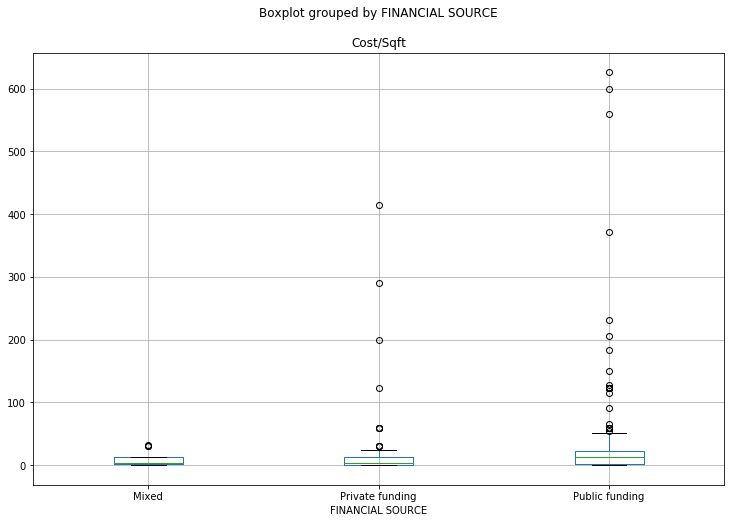

In [26]:
asla.boxplot('Cost/Sqft', by='FINANCIAL SOURCE', figsize=(12, 8))

**Testing the Cost/Sq Ft by Financial Source**

In [27]:
import scipy.stats as stats

mixed = list(asla[asla['FINANCIAL SOURCE']=='Mixed']['Cost/Sqft'].values)
public = list(asla[asla['FINANCIAL SOURCE']=='Public funding']['Cost/Sqft'].values)
private = list(asla[asla['FINANCIAL SOURCE']=='Private funding']['Cost/Sqft'].values)

stats.f_oneway(mixed,public,private)

F_onewayResult(statistic=1.4974108427694688, pvalue=0.22484380848319827)

In [28]:
stats.ttest_ind(public,private)

Ttest_indResult(statistic=1.4484402208074285, pvalue=0.1482278673107445)

In [29]:
any_priv = private + mixed
stats.ttest_ind(public,any_priv)

Ttest_indResult(statistic=1.6732829893294674, pvalue=0.094979130268016909)

In [30]:
asla[asla['FINANCIAL SOURCE']=='Public funding']['Cost/Sqft'].values

array([  5.60146924e+02,   3.71533517e+02,   1.83654729e+02,
         8.22620141e+00,   4.15579798e+01,   3.81294261e+01,
         3.67309458e+01,   5.12473217e+01,   2.80073462e+01,
         2.05930807e+02,   2.29568411e+01,   2.29568411e+01,
         2.29568411e+01,   2.29568411e+01,   2.29568411e+01,
         2.29568411e+01,   2.29568411e+01,   2.29568411e+01,
         3.82614019e+01,   2.29568411e+01,   3.82614019e+01,
         2.29568411e+01,   3.59657178e+01,   2.15794307e+01,
         2.13503030e+01,   1.79063361e+01,   1.69880624e+01,
         1.60697888e+01,   2.44872972e+01,   2.44872972e+01,
         1.43919559e+01,   6.26000000e+02,   1.27677100e+02,
         1.37741047e+01,   1.37741047e+01,   2.29568411e+01,
         2.29568411e+01,   1.23558484e+02,   1.37741047e+01,
         1.37741047e+01,   2.29568411e+01,   1.37741047e+01,
         1.23558484e+02,   2.29568411e+01,   1.37741047e+01,
         2.29568411e+01,   2.29568411e+01,   2.29568411e+01,
         2.29568411e+01,

In [31]:
asla[asla['FINANCIAL SOURCE']=='Private funding']['Cost/Sqft'].values

array([  4.14141414e+02,   2.90786654e+02,   2.29568411e+01,
         2.29568411e+01,   1.37741047e+01,   1.37741047e+01,
         2.29568411e+01,   1.37741047e+01,   1.37741047e+01,
         1.37741047e+01,   2.29568411e+01,   2.29568411e+01,
         2.29568411e+01,   1.37741047e+01,   1.23558484e+02,
         1.86715641e+01,   6.79981635e+00,   6.37281910e+00,
         2.00000000e+02,   6.84879094e+00,   4.08236915e+00,
         3.44352617e+00,   5.73921028e+00,   5.73921028e+00,
         3.08896211e+01,   5.73921028e+00,   3.08896211e+01,
         3.08896211e+01,   5.73921028e+00,   5.73921028e+00,
         3.08896211e+01,   2.98820018e+00,   4.73267524e+00,
         2.47116969e+01,   4.43832262e+00,   3.09152127e+00,
         1.72176309e+00,   1.37741047e+00,   1.37741047e+00,
         2.29568411e-02,   1.23558484e+01,   1.23558484e+01,
         2.29568411e+00,   1.23558484e+01,   6.00000000e+01,
         2.29568411e+00,   1.23558484e+01,   2.29568411e+00,
         2.29568411e+00,

In [32]:
asla[asla['FINANCIAL SOURCE']=='Mixed']['Cost/Sqft'].values

array([  6.42791552,  32.94892916,  30.88962109,   0.43044077,
        30.88962109,   2.75482094,   3.25221916,  12.35584843,
        12.35584843,   2.29568411,   3.76029654,   2.96540362,
         0.22956841,   0.0765228 ,   0.0765228 ])

[<img src="https://i2.wp.com/nysufc.org/wp-content/uploads/2017/03/savetherain1.jpg" style="width:500px">](http://savetherain.us/green-project-list/)

In [33]:
body = client_48928a04ca8e42ed87d1026e6bbfe31a.get_object(Bucket='courseracapstone-donotdelete-pr-fxod1bkevlkezk',Key='SaveRain-2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

rain = pd.read_csv(body)
rain['Size/ Capture area (Sq. feet)'] = rain['Size/ Capture area (Sq. feet)'].astype(float)
rain['GI COST (2)'] = rain['GI COST (2)'].astype(float)

In [34]:
print('Initial Row Count: ',rain.shape[0])

Initial Row Count:  150


In [35]:
columns = ['CITY','STATE','FINANCIAL SOURCE']

for column in columns:
    rain[column] = rain[column].str.lstrip()  #removing leading spaces

In [36]:
rain['FINANCIAL SOURCE'].unique()

array(['Public financing', 'Mixed', nan, 'Public Funding',
       'Public funding', 'Public funding & financing', 'Public Financing',
       'Private funding', 'Public funding '], dtype=object)

In [37]:
# Standardizing 

rain['FINANCIAL SOURCE'][rain['FINANCIAL SOURCE']=='Public Financing'] = 'Public'
rain['FINANCIAL SOURCE'][rain['FINANCIAL SOURCE']=='Public financing'] = 'Public'
rain['FINANCIAL SOURCE'][rain['FINANCIAL SOURCE']=='Public Funding'] = 'Public'
rain['FINANCIAL SOURCE'][rain['FINANCIAL SOURCE']=='Public funding'] = 'Public'
rain['FINANCIAL SOURCE'][rain['FINANCIAL SOURCE']=='Public funding & financing'] = 'Public'
rain['FINANCIAL SOURCE'][rain['FINANCIAL SOURCE']=='Private funding'] = 'Private'

In [38]:
rain[rain['FINANCIAL SOURCE'].isnull()]  #these cases have no information attached

,CITY,STATE,CASE STUDY TITLE,FINANCIAL SOURCE,FINANCIAL TOOL,Size/ Capture area (Sq. feet),GI COST (2)
2,Pontiac,Michigan,Oakland County Campus,NaN,NaN,"6,141,960.00","204,000.00"
36,Ann Arbor,Michigan,"Ann Arbor District Library, Mallets Creek Branch",NaN,NaN,"108,900.00","70,000.00"
125,City of Troy,Michigan,Kresge Foundation Headquarters,NaN,NaN,nan,"1,116,000.00"
129,City of Inkster,Michigan,Inkster Valley Constructed Wetlands Project,NaN,NaN,nan,"464,826.00"
143,Bloomfield Township,Michigan,Meadowlake Farms Bioswale,NaN,NaN,nan,"63,000.00"
147,City of Wayne,Michigan,Constructed Linear Sand Filter,NaN,NaN,nan,"10,000.00"
149,Mount Clemens,Michigan,Macomb County Public Works Riparian Corridor P...,NaN,NaN,nan,nan


In [39]:
print('These are all Michigan cases; ',(rain[rain['FINANCIAL SOURCE'].isnull()]['STATE'].count())/(rain[rain['STATE']=='Michigan']['STATE'].count()) * 100,'% of them')

These are all Michigan cases;  35.0 % of them


In [40]:
rain = rain[rain['FINANCIAL SOURCE'].notnull()]

In [41]:
print('New Row Count:',rain.shape[0])
print('Lost:',150-rain.shape[0],'rows')

New Row Count: 143
Lost: 7 rows


In [42]:
print('There are',sum(rain['Size/ Capture area (Sq. feet)'].isnull()),'cases missing project size')
print('There are',sum(rain['GI COST (2)'].isnull()),'cases missing project cost')

There are 24 cases missing project size
There are 1 cases missing project cost


In [43]:
rain[rain['Size/ Capture area (Sq. feet)'].isnull()]

,CITY,STATE,CASE STUDY TITLE,FINANCIAL SOURCE,FINANCIAL TOOL,Size/ Capture area (Sq. feet),GI COST (2)
121,St. Paul,Minnesota,The Metro Green Line,Public funding,Grants,nan,"5,114,865.00"
122,Aiken,South Carolina,Sand River Headwaters Green Infrastructure Pro...,Public,Grants (Various),nan,"3,759,546.00"
123,Portland,Oregon,SW Texas Green Street,Mixed,"Private donations and sponsorships, and grants",nan,"2,319,000.00"
124,Milwaukee,Wisconsin,Menomonee Valley Industrial Center,Public,Grants,nan,"1,600,000.00"
126,South Shore,Massachusetts,North and South Rivers Watershed Association R...,Public,Grant,nan,"825,170.00"
127,Lancaster,Pennsylvania,Lancaster Parking Lot Transformations,Mixed,"Grant, loan",nan,"640,000.00"
128,New York,New York,Queens Botanical Garden,Mixed,Public funding and private donations,nan,"568,000.00"
130,Waltham,Massachusetts,Waltham Watch Factory,Mixed,"Taxes, loans and private funding",nan,"434,600.00"
131,Syracuse,New York,"Lysander Tree Planting, Manhole Repair & Pipe ...",Public,Grants,nan,"400,000.00"
132,Grand Rapids,Michigan,Plainfield Avenue,Mixed,"Grants, PPP, private donations & sponsorships",nan,"330,887.00"


In [44]:
rain[rain['GI COST (2)'].isnull()]

,CITY,STATE,CASE STUDY TITLE,FINANCIAL SOURCE,FINANCIAL TOOL,Size/ Capture area (Sq. feet),GI COST (2)
28,Ann Arbor,Michigan,Washtenaw County West Service Center,Public,Bonds,"133,293.60",nan


In [45]:
rain = rain[rain['Size/ Capture area (Sq. feet)'].notnull()]
rain = rain[rain['GI COST (2)'].notnull()]

In [46]:
print('New Row Count:',rain.shape[0])
print('Lost:',143-rain.shape[0],'rows')
print('Total Rows Lost:',7+(143-rain.shape[0]))

New Row Count: 118
Lost: 25 rows
Total Rows Lost: 32


In [47]:
rain[['Size/ Capture area (Sq. feet)','GI COST (2)']].describe()

,Size/ Capture area (Sq. feet),GI COST (2)
count,118.00,118.00
mean,"439,329.80","521,435.27"
std,"2,811,356.63","1,429,508.70"
min,282.00,"2,875.00"
25%,"13,090.00","106,688.25"
50%,"39,500.00","212,102.50"
75%,"129,264.25","439,951.75"
max,"29,620,800.00","14,700,000.00"


In [48]:
rain['Cost/Sqft'] = rain['GI COST (2)'] / rain['Size/ Capture area (Sq. feet)']
rain[['Cost/Sqft']].describe()

,Cost/Sqft
count,118.00
mean,14.12
std,47.94
min,0.02
25%,2.79
50%,5.91
75%,10.60
max,500.00


In [49]:
syracuse = rain[rain['CITY']=='Syracuse']
syracuse[['Size/ Capture area (Sq. feet)','GI COST (2)']].describe()

,Size/ Capture area (Sq. feet),GI COST (2)
count,96.00,96.00
mean,"117,355.70","361,419.03"
std,"250,713.07","555,741.13"
min,560.00,"2,875.00"
25%,"13,840.00","102,344.50"
50%,"39,000.00","208,400.00"
75%,"101,685.50","385,000.00"
max,"1,966,000.00","4,519,790.65"


In [50]:
other = rain[rain['CITY']!='Syracuse']
other[['Size/ Capture area (Sq. feet)','GI COST (2)']].describe()

,Size/ Capture area (Sq. feet),GI COST (2)
count,22.00,22.00
mean,"1,844,307.68","1,219,687.95"
std,"6,419,409.88","3,059,442.85"
min,282.00,"33,042.00"
25%,"12,000.00","147,000.00"
50%,"98,010.00","398,500.00"
75%,"300,564.00","1,000,000.00"
max,"29,620,800.00","14,700,000.00"


In [51]:
print('Total awards =',sum(rain['GI COST (2)']))
print('Total Syracuse awards =',sum(syracuse['GI COST (2)']),'(',round((sum(syracuse['GI COST (2)'])/sum(rain['GI COST (2)'])*100),2),'%)')
print('Total non-Syracuse awards =',sum(other['GI COST (2)']),'(',round((sum(other['GI COST (2)'])/sum(rain['GI COST (2)'])*100),2),'%)')                                                                     

Total awards = 61529361.720000006
Total Syracuse awards = 34696226.72 ( 56.39 %)
Total non-Syracuse awards = 26833135.0 ( 43.61 %)


In [52]:
print('Total states represented = ',len(other['STATE'].unique()))

Total states represented =  9


In [53]:
other.groupby('STATE')['GI COST (2)'].sum().sort_values(ascending=False)

STATE
Washington            14,700,000.00
Michigan               4,962,600.00
New Mexico             2,000,000.00
Pennsylvania           1,377,000.00
Illinois               1,300,000.00
New York                 948,717.00
Oregon                   624,818.00
Arizona                  500,000.00
Colorado                 420,000.00
Name: GI COST (2), dtype: float64

In [54]:
other.groupby('STATE')['CITY'].count().sort_values(ascending=False)

STATE
Michigan        9
Oregon          5
Pennsylvania    2
Washington      1
New York        1
New Mexico      1
Illinois        1
Colorado        1
Arizona         1
Name: CITY, dtype: int64

In [55]:
syracuse_types = syracuse.groupby('FINANCIAL SOURCE')
syracuse_types['Cost/Sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
FINANCIAL SOURCE,,,,,,,,
Mixed,2.00,11.17,5.79,7.07,9.12,11.17,13.22,15.26
Public,94.00,8.07,9.26,0.02,2.93,5.91,9.39,70.74


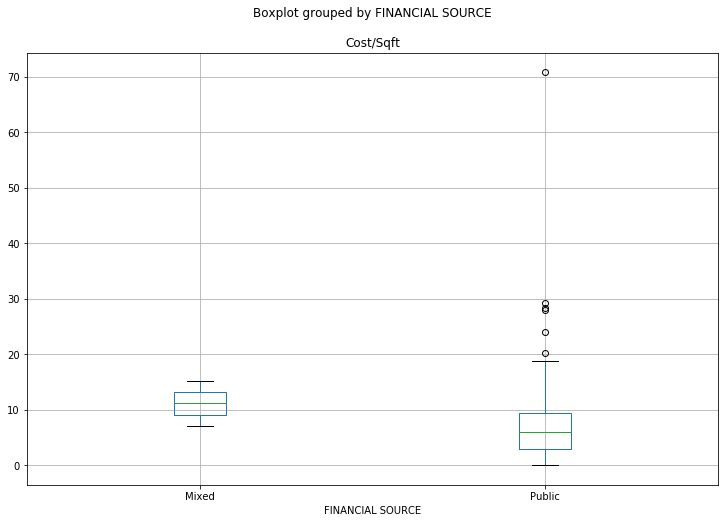

In [56]:
syracuse.boxplot('Cost/Sqft', by='FINANCIAL SOURCE', figsize=(12, 8))

In [57]:
other_types = other.groupby('FINANCIAL SOURCE')
other_types['Cost/Sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
FINANCIAL SOURCE,,,,,,,,
Mixed,4.00,7.66,7.17,0.05,2.40,7.80,13.05,14.98
Private,1.00,18.27,nan,18.27,18.27,18.27,18.27,18.27
Public,17.00,49.21,121.50,0.14,2.30,2.91,31.58,500.00


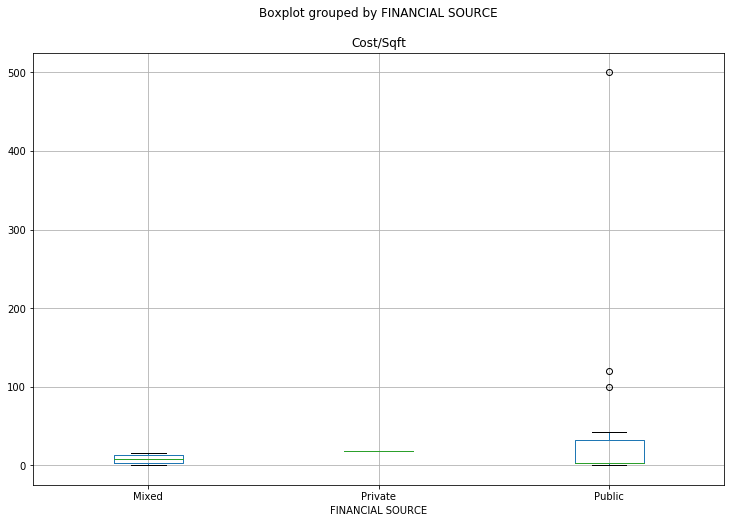

In [58]:
other.boxplot('Cost/Sqft', by='FINANCIAL SOURCE', figsize=(12, 8))